In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

In [3]:
! wget https://www.dropbox.com/s/mw6ctze0ikcuqt4/mnist_train.csv?dl=0 -O mnist_train.csv

--2020-07-17 13:10:44--  https://www.dropbox.com/s/mw6ctze0ikcuqt4/mnist_train.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/mw6ctze0ikcuqt4/mnist_train.csv [following]
--2020-07-17 13:10:44--  https://www.dropbox.com/s/raw/mw6ctze0ikcuqt4/mnist_train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc48e8d3ece4ea34bf11a96c93f8.dl.dropboxusercontent.com/cd/0/inline/A7vWJj9VFrgBRKzdJuAAGE9K3W74QIlzjac8aP8xyUuQs5L4QQeCqMJpaziwAbPjVV2-1CzM0RVhIXfIxiWxG8F3JD-eqQkkvlysjvQzDQxy1RTyLR88wJEzp2GCvHwRtuE/file# [following]
--2020-07-17 13:10:44--  https://uc48e8d3ece4ea34bf11a96c93f8.dl.dropboxusercontent.com/cd/0/inline/A7vWJj9VFrgBRKzdJuAAGE9K3W74QIlzjac8aP8xyUuQs5L4QQeCqMJpaziwAbPjVV2-1CzM0RVhIXfIxiWxG8F3JD-eqQkkvlys

In [4]:
! wget https://www.dropbox.com/s/e8n5v1sea2housp/mnist_test.csv?dl=0 -O mnist_test.csv

--2020-07-17 13:10:47--  https://www.dropbox.com/s/e8n5v1sea2housp/mnist_test.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/e8n5v1sea2housp/mnist_test.csv [following]
--2020-07-17 13:10:48--  https://www.dropbox.com/s/raw/e8n5v1sea2housp/mnist_test.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc12cc79e7c5e7c66bf5ba710d3c.dl.dropboxusercontent.com/cd/0/inline/A7vfFuRu9tvhDuxPsqgwSaa1nvM5jHG2V0MrnUqL4BVXfFhaHk4WpsRKZLd4pc57nXjiusEfAAJK0fkTXT77uzdEHD3u-SDysVdihko4ALsWci8hq5kez4Ws-9t6FFqd0vU/file# [following]
--2020-07-17 13:10:48--  https://uc12cc79e7c5e7c66bf5ba710d3c.dl.dropboxusercontent.com/cd/0/inline/A7vfFuRu9tvhDuxPsqgwSaa1nvM5jHG2V0MrnUqL4BVXfFhaHk4WpsRKZLd4pc57nXjiusEfAAJK0fkTXT77uzdEHD3u-SDysVdihko

In [5]:
train_data = np.loadtxt("mnist_train.csv", 
                        delimiter=",")
test_data = np.loadtxt("mnist_test.csv", 
                       delimiter=",")

In [6]:
test_labels = test_data[:, 0].astype(int)
test_images = test_data[:, 1:].reshape(-1, 28*28) / 255.
train_labels = train_data[:, 0].astype(int)
train_images = train_data[:, 1:].reshape(-1, 28*28) / 255.

In [7]:
pipeline = Pipeline([
    ('PCA', PCA()),
    ('classifier', neighbors.KNeighborsClassifier())
    ]
)

In [8]:
params = {
    'PCA__n_components': range(10, 40, 10),
    'classifier__n_neighbors': range(1, 23, 5)
}

In [10]:
grid = GridSearchCV(pipeline, param_grid=params, cv=2, verbose=2)
grid.fit(train_images, train_labels)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
[CV] PCA__n_components=10, classifier__n_neighbors=1 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. PCA__n_components=10, classifier__n_neighbors=1, total=   4.6s
[CV] PCA__n_components=10, classifier__n_neighbors=1 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV] .. PCA__n_components=10, classifier__n_neighbors=1, total=   4.3s
[CV] PCA__n_components=10, classifier__n_neighbors=6 .................
[CV] .. PCA__n_components=10, classifier__n_neighbors=6, total=   5.7s
[CV] PCA__n_components=10, classifier__n_neighbors=6 .................
[CV] .. PCA__n_components=10, classifier__n_neighbors=6, total=   5.7s
[CV] PCA__n_components=10, classifier__n_neighbors=11 ................
[CV] . PCA__n_components=10, classifier__n_neighbors=11, total=   6.4s
[CV] PCA__n_components=10, classifier__n_neighbors=11 ................
[CV] . PCA__n_components=10, classifier__n_neighbors=11, total=   6.4s
[CV] PCA__n_components=10, classifier__n_neighbors=16 ................
[CV] . PCA__n_components=10, classifier__n_neighbors=16, total=   6.9s
[CV] PCA__n_components=10, classifier__n_neighbors=16 ................
[CV] . PCA__n_components=10, classifier__n_neighbors=16, total=   6.9s
[CV] PCA__n_components=10, classifier__n_neighbors=21 ................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 10.7min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('PCA',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('classifier',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
           

In [11]:
grid.best_score_

0.9693833333333333

In [12]:
grid.best_estimator_.score(test_images, test_labels)

0.9747

In [13]:
grid.best_params_

{'PCA__n_components': 30, 'classifier__n_neighbors': 6}

In [32]:
import matplotlib.pyplot as plt
import random

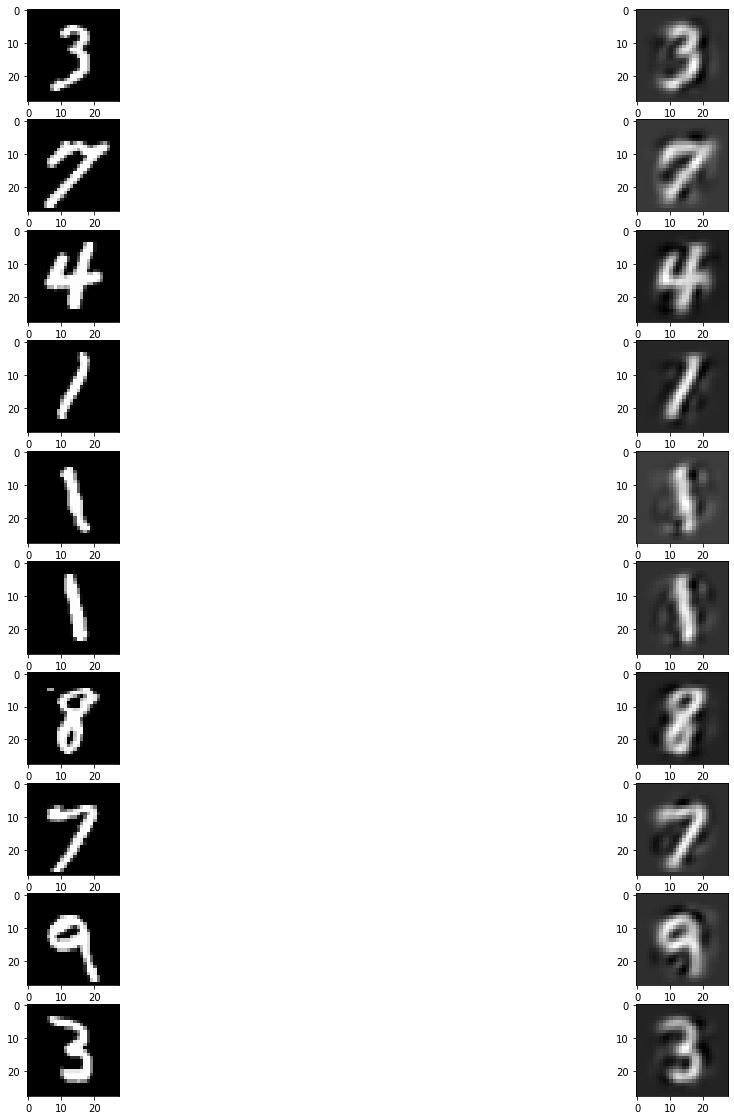

In [42]:
n = 10
idxs = random.choices(range(test_images.shape[0]), k=n)
fig, axes = plt.subplots(n, 2, figsize=(20, 20))
for i in range(n):
    axes[i][0].imshow(test_images[idxs[i]].reshape(28,28), cmap='gray')
    pca = grid.best_estimator_['PCA'].transform([test_images[idxs[i]]])
    rec_image = grid.best_estimator_['PCA'].inverse_transform(pca)
    axes[i][1].imshow(rec_image.reshape(28,28), cmap='gray')